<a href="https://colab.research.google.com/github/jerry14771/Default-of-credit-card-clients/blob/main/Default_of_credit_card_clients_Capstone_Project_Notebook_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
from sklearn.model_selection import GridSearchCV as gsv
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(pd.__version__)

1.3.5


In [ ]:
!pip install --upgrade xlrd

     |████████████████████████████████| 96 kB 2.7 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
!pip3 install pandas --upgrade

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Capstone Project- Credit Card Fraud/Copy of default of credit card clients.xls', index_col=None)

In [ ]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [ ]:
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
30000,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [ ]:
df.shape

(30000, 25)

In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

In [ ]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,...,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,30000,81,2,7,4,56,11,11,11,11,...,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
top,1,50000,2,2,2,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  object
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  object
 6   PAY_0                       30000 non-null  object
 7   PAY_2                       30000 non-null  object
 8   PAY_3                       30000 non-null  object
 9   PAY_4                       30000 non-null  object
 10  PAY_5                       30000 non-null  object
 11  PAY_6                       30000 non-null  object
 12  BILL_AMT1                   30000 non-null  object
 13  BILL_AMT2                   30000 non-null  ob

In [ ]:
df.isna().sum()

0
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

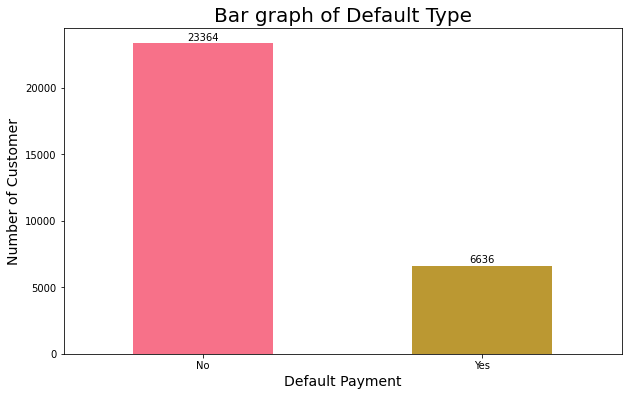

In [ ]:
default_type = df['default payment next month'].value_counts()
plt.figure(figsize=(10, 6))
ax = default_type.plot(kind='bar', rot=0, color=sns.color_palette('husl'))
ax.set_title("Bar graph of Default Type", y = 1, fontsize=20)
plt.xlabel('Default Payment', fontsize=14)
plt.ylabel('Number of Customer', fontsize=14)
plt.xticks([0,1],['No','Yes'])

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

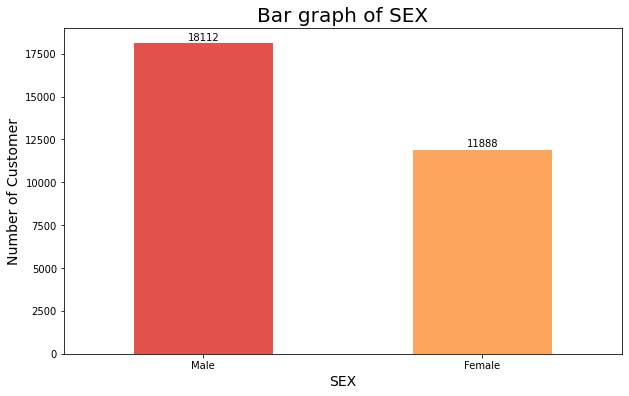

In [ ]:
default_type = df['SEX'].value_counts()
plt.figure(figsize=(10, 6))
ax = default_type.plot(kind='bar', rot=0, color=sns.color_palette('Spectral'))
ax.set_title("Bar graph of SEX", y = 1, fontsize=20)
plt.xlabel('SEX', fontsize=14)
plt.ylabel('Number of Customer', fontsize=14)
plt.xticks([0,1],['Male','Female'])

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

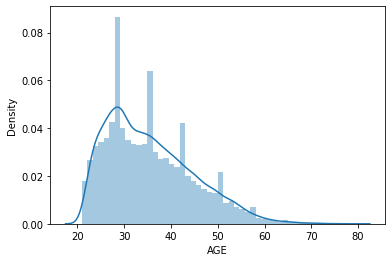

In [ ]:
sns.distplot(df['AGE'])

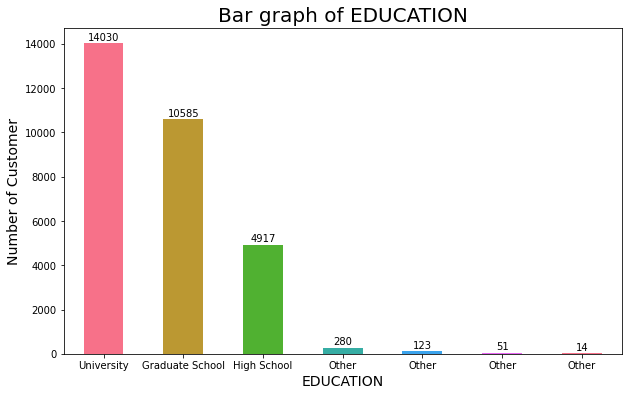

In [ ]:
default_type = df['EDUCATION'].value_counts()
plt.figure(figsize=(10, 6))
ax = default_type.plot(kind='bar', rot=0, color=sns.color_palette('husl'))
ax.set_title("Bar graph of EDUCATION", y = 1, fontsize=20)
plt.xlabel('EDUCATION', fontsize=14)
plt.ylabel('Number of Customer', fontsize=14)
# 1 = graduate school; 2 = university; 3 = high school; 4 = others
plt.xticks([0,1,2,3,4,5,6],['University','Graduate School', 'High School', 'Other', 'Other', 'Other', 'Other'])

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

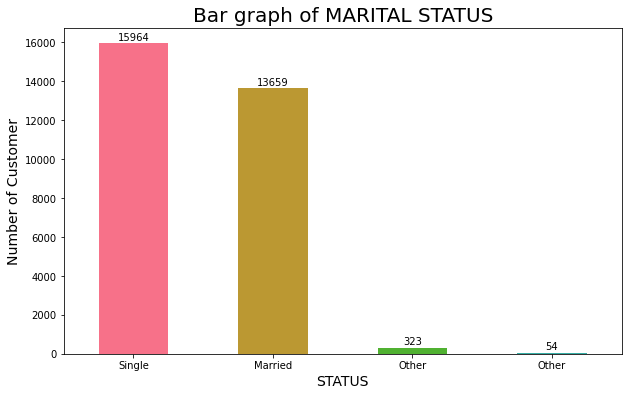

In [ ]:
default_type = df['MARRIAGE'].value_counts()
plt.figure(figsize=(10, 6))
ax = default_type.plot(kind='bar', rot=0, color=sns.color_palette('husl'))
ax.set_title("Bar graph of MARITAL STATUS", y = 1, fontsize=20)
plt.xlabel('STATUS', fontsize=14)
plt.ylabel('Number of Customer', fontsize=14)
plt.xticks([0,1,2,3],['Single','Married','Other','Other'])

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

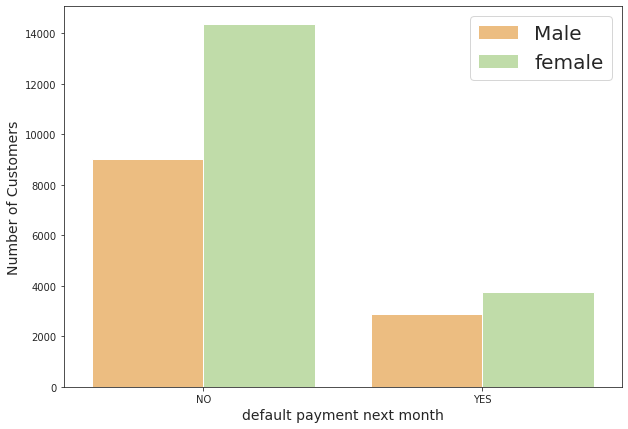

In [ ]:
sns.set_style('ticks')
plt.figure(figsize=(10,7))
sns.countplot(data = df, x = 'default payment next month', hue='SEX', palette="Spectral")
plt.xlabel("default payment next month", fontsize=14)
plt.ylabel("Number of Customers", fontsize=14)
plt.xticks([0,1],['NO','YES'])
plt.legend(['Male','female'],prop={'size':20})

Text(0, 0.5, 'Number of Customers')

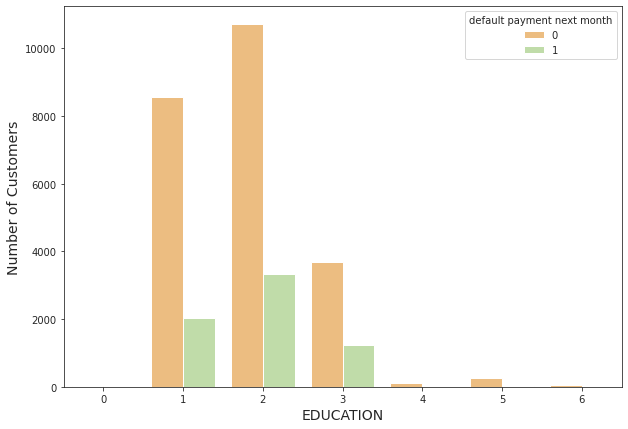

In [ ]:
sns.set_style('ticks')
plt.figure(figsize=(10,7))
sns.countplot(data = df, x = 'EDUCATION', hue='default payment next month', palette="Spectral")
plt.xlabel("EDUCATION", fontsize=14)
plt.ylabel("Number of Customers", fontsize=14)

#DATA PRE-PROCESSING

In [ ]:
df=df.apply(pd.to_numeric)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
df.drop('ID', axis=1, inplace=True) #Dropping ID

In [ ]:
list_of_columns=['PAY_0', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for i in list_of_columns:
  df[i]=df[i].apply(lambda x: 0 if x<0 else x)

In [ ]:
# df['MARRIAGE'] = df['MARRIAGE'].apply(lambda x: 3 if x==0 else x)

In [ ]:
df['EDUCATION'] = df['EDUCATION'].apply(lambda x: 4 if x!=1 and x!=2 and x!=3 else x)

plotting heatmap to check Correlation

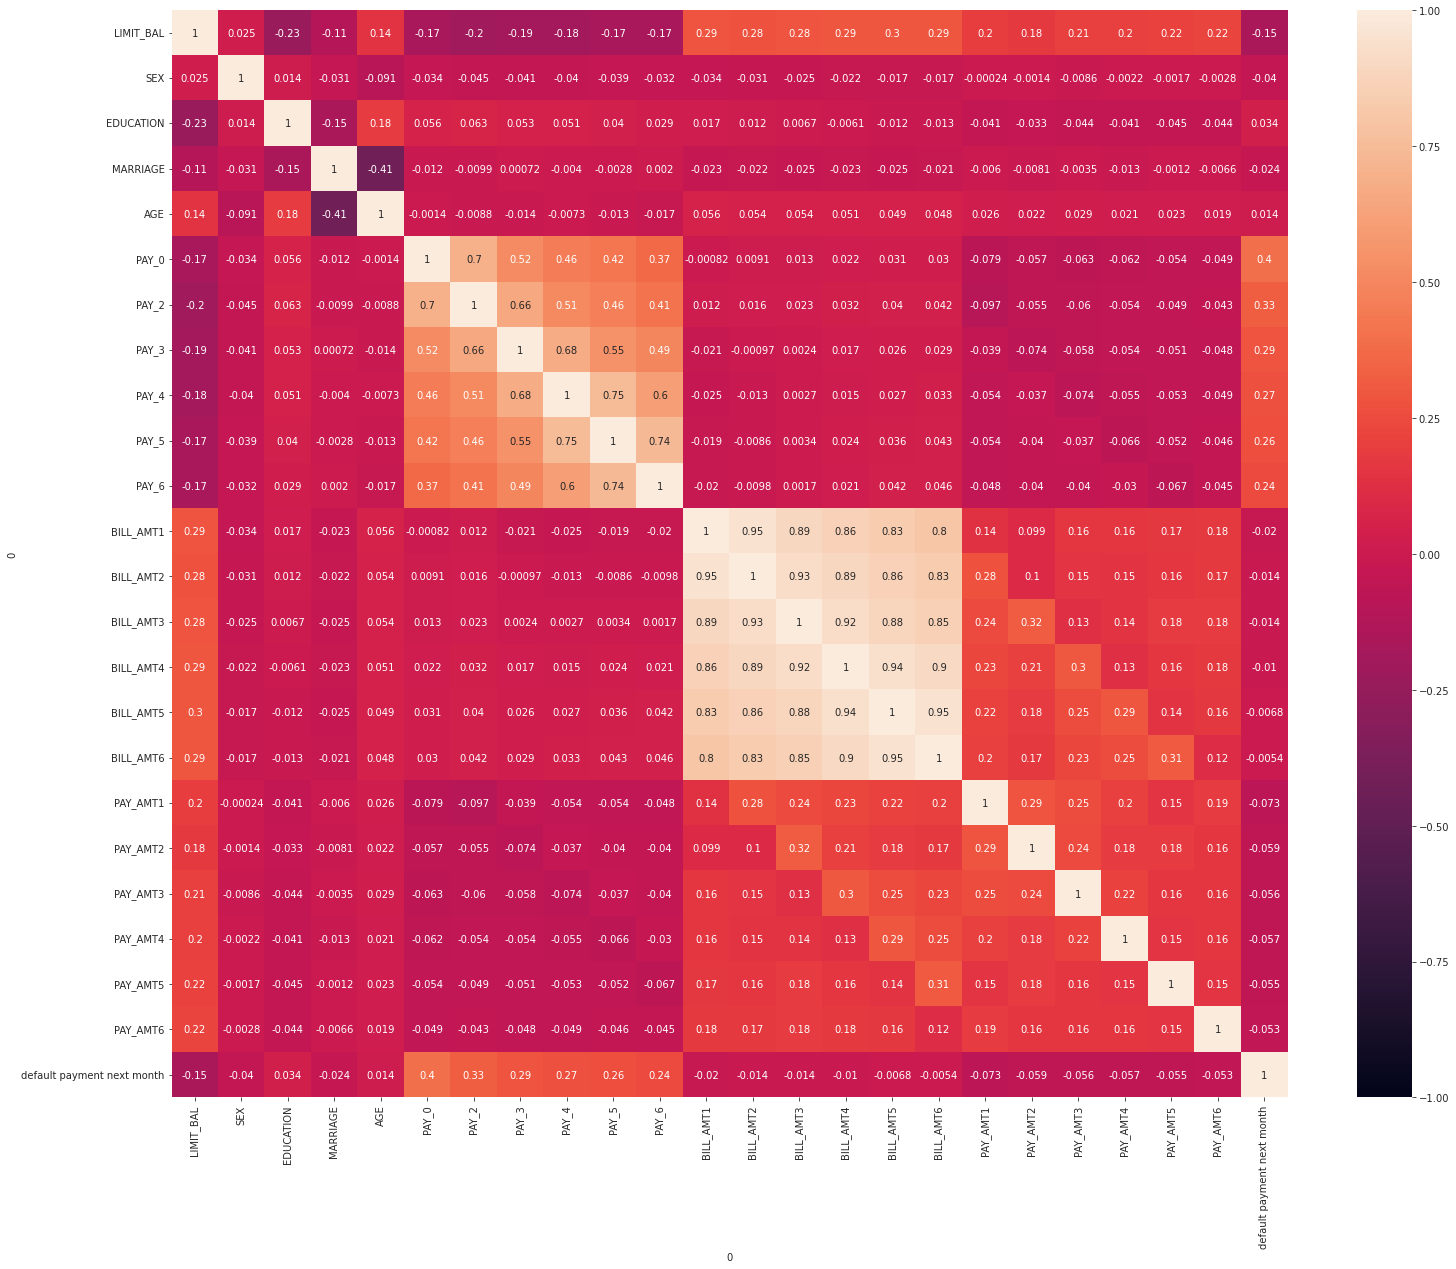

In [ ]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),annot=True, vmin=-1.0)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
def check_vif(dataframe):
  '''
  This function calculates the variance inflation factor of the independent features in the datasdet
  '''

  # the independent variables set
  X =dataframe
  # VIF dataframe
  vif_data = pd.DataFrame()
  vif_data["feature"] = X.columns
    
  # calculating VIF for each feature
  vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                            for i in range(len(X.columns))]
  print(vif_data)

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,0,0,0,0,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,0,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,0,0,0,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
column_list = list(set(df.columns)-{'default payment next month'})

In [ ]:
check_vif(df[column_list])

      feature        VIF
0       PAY_4   3.311982
1    PAY_AMT6   1.270125
2         AGE  11.297935
3       PAY_5   3.560422
4   LIMIT_BAL   3.591889
5       PAY_3   2.888543
6    PAY_AMT1   1.901345
7    PAY_AMT3   1.895299
8    PAY_AMT4   1.791285
9    PAY_AMT2   2.377861
10  BILL_AMT1  20.743845
11  BILL_AMT5  35.875686
12   PAY_AMT5   1.849975
13      PAY_0   2.468699
14        SEX   9.118332
15  BILL_AMT6  21.364614
16  BILL_AMT4  29.416917
17  EDUCATION   7.358841
18  BILL_AMT2  38.101614
19   MARRIAGE   6.321577
20      PAY_2   3.036969
21  BILL_AMT3  31.733257
22      PAY_6   2.521797


In [ ]:
column_list_new = list(set(df.columns)-{'default payment next month','BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5','AGE'})

In [ ]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

In [ ]:
check_vif(df[column_list_new])

      feature       VIF
0       PAY_0  2.462867
1         SEX  8.219996
2       PAY_4  3.310276
3   BILL_AMT6  4.872394
4    PAY_AMT6  1.234867
5   EDUCATION  5.378616
6       PAY_5  3.559750
7   LIMIT_BAL  3.115155
8       PAY_3  2.884639
9    MARRIAGE  6.199500
10      PAY_2  3.035878
11   PAY_AMT1  1.334603
12   PAY_AMT3  1.289267
13      PAY_6  2.519290
14   PAY_AMT4  1.264558
15   PAY_AMT2  1.252932
16  BILL_AMT1  4.566591
17   PAY_AMT5  1.310419


In [ ]:
new_df=df.copy()

In [ ]:
df=new_df[column_list_new + ['default payment next month']]

In [ ]:
df.head()

,PAY_0,SEX,PAY_4,BILL_AMT6,PAY_AMT6,EDUCATION,PAY_5,LIMIT_BAL,PAY_3,MARRIAGE,PAY_2,PAY_AMT1,PAY_AMT3,PAY_6,PAY_AMT4,PAY_AMT2,BILL_AMT1,PAY_AMT5,default payment next month
1,2,2,0,0,0,2,0,20000,0,1,2,0,0,0,0,689,3913,0,1
2,0,2,0,3261,2000,2,0,120000,0,2,2,0,1000,2,1000,1000,2682,0,1
3,0,2,0,15549,5000,2,0,90000,0,2,0,1518,1000,0,1000,1500,29239,1000,0
4,0,2,0,29547,1000,2,0,50000,0,1,0,2000,1200,0,1100,2019,46990,1069,0
5,0,1,0,19131,679,2,0,50000,0,1,0,2000,10000,0,9000,36681,8617,689,0


In [ ]:
dummies = pd.get_dummies(df['SEX'], prefix='Gender', drop_first = True)
df=pd.concat([df,dummies], axis=1)
df.drop('SEX', axis=1, inplace=True)

In [ ]:
dummies1 = pd.get_dummies(df['EDUCATION'], prefix='EDU',  drop_first = True)
df=pd.concat([df,dummies1], axis=1)
df.drop('EDUCATION', axis=1, inplace=True)

In [ ]:
dummies2 = pd.get_dummies(df['MARRIAGE'], prefix='MARRY',  drop_first = True)
df=pd.concat([df,dummies2], axis=1)
df.drop('MARRIAGE', axis=1, inplace=True)

In [ ]:
df.head(10)

,PAY_0,PAY_4,BILL_AMT6,PAY_AMT6,PAY_5,LIMIT_BAL,PAY_3,PAY_2,PAY_AMT1,PAY_AMT3,PAY_6,PAY_AMT4,PAY_AMT2,BILL_AMT1,PAY_AMT5,default payment next month,Gender_2,EDU_2,EDU_3,EDU_4,MARRY_1,MARRY_2,MARRY_3
1,2,0,0,0,0,20000,0,2,0,0,0,0,689,3913,0,1,1,1,0,0,1,0,0
2,0,0,3261,2000,0,120000,0,2,0,1000,2,1000,1000,2682,0,1,1,1,0,0,0,1,0
3,0,0,15549,5000,0,90000,0,0,1518,1000,0,1000,1500,29239,1000,0,1,1,0,0,0,1,0
4,0,0,29547,1000,0,50000,0,0,2000,1200,0,1100,2019,46990,1069,0,1,1,0,0,1,0,0
5,0,0,19131,679,0,50000,0,0,2000,10000,0,9000,36681,8617,689,0,0,1,0,0,1,0,0
6,0,0,20024,800,0,50000,0,0,2500,657,0,1000,1815,64400,1000,0,0,0,0,0,0,1,0
7,0,0,473944,13770,0,500000,0,0,55000,38000,0,20239,40000,367965,13750,0,0,0,0,0,0,1,0
8,0,0,567,1542,0,100000,0,0,380,0,0,581,601,11876,1687,0,1,1,0,0,0,1,0
9,0,0,3719,1000,0,140000,2,0,3329,432,0,1000,0,11285,1000,0,1,0,1,0,1,0,0
10,0,0,13912,0,0,20000,0,0,0,0,0,13007,0,0,1122,0,0,0,1,0,0,1,0


#Seperate Dependent and Independent Variable

In [ ]:
X=df[set(df.columns)-{'default payment next month'}]

In [ ]:
col=list(X.columns)

In [ ]:
Y=df['default payment next month']

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

x_smote, y_smote = smote.fit_resample(X, Y)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_smote,y_smote, test_size = 0.2, random_state = 3)

In [ ]:
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

In [ ]:
def scores(y_test,y_pred):
  print('The roc auc score is',roc_auc_score(y_test, y_pred) *100)
  print('The accuracy score is ',accuracy_score(y_test, y_pred) *100)
  print('The precision score is',precision_score(y_test, y_pred) *100)
  print('The recall score is',recall_score(y_test, y_pred) *100)
  print('The f1 score is',f1_score(y_test, y_pred) *100)

#Implementing Logistic Regression

In [ ]:
Logistic = LogisticRegression()
Logistic.fit(x_train, y_train)
y_pred = Logistic.predict(x_test)

In [ ]:
scores(y_test,y_pred)

The roc auc score is 78.18092020077059
The accuracy score is  78.19387973464583
The precision score is 83.16081797525877
The recall score is 70.61093247588424
The f1 score is 76.3737537676791


-----

#Hyper-Parameter Tuning in  Logistic Regression Model

In [ ]:
param_grid = [{'penalty': ['l1','l2','elasticnet'],
               'max_iter': [100,500,1000],
               'C' : [0.015, 0.01,0.005]
               }
              ]
Logistic1 = LogisticRegression()
clf = gsv(Logistic1, param_grid=param_grid, cv=7, verbose=True, n_jobs=-1)
best_clf = clf.fit(x_train,y_train)
print(clf.best_params_)
print(clf.best_score_)

Fitting 7 folds for each of 27 candidates, totalling 189 fits
{'C': 0.005, 'max_iter': 100, 'penalty': 'l2'}
0.7778341657543045


----------------

In [ ]:
BestLogistic = LogisticRegression(C = 0.005, max_iter= 100, penalty='l2')
BestLogistic.fit(x_train,y_train)
y_pred=BestLogistic.predict(x_test)

In [ ]:
scores(y_test,y_pred)

The roc auc score is 78.0427570532675
The accuracy score is  78.0547827947785
The precision score is 82.57726819541375
The recall score is 71.0182207931404
The f1 score is 76.3627982021436


-----------

#Random Forest Implementation

In [ ]:
Random = RandomForestClassifier()
Random.fit(x_train,y_train)
y_pred = Random.predict(x_test)

In [ ]:
scores(y_test,y_pred)

The roc auc score is 85.12109224469722
The accuracy score is  85.12732719880162
The precision score is 87.84377166628148
The recall score is 81.47909967845659
The f1 score is 84.54181494661923


#Random Forest (Cross-Validation and Hyper-Parameter tuning)

In [ ]:
param_grid=[{'n_estimators' : [1000,1500],'max_features' : ['log2']}]
Random1 = RandomForestClassifier()
clf = gsv(Random1, param_grid=param_grid, cv=4, verbose=True, n_jobs=-1,scoring='f1')
Best_fit1=clf.fit(x_train,y_train)
print(clf.best_params_)
print(clf.best_score_)

Fitting 4 folds for each of 2 candidates, totalling 8 fits
{'max_features': 'log2', 'n_estimators': 1500}
0.8380919869829604


In [ ]:
Best_Random1 = RandomForestClassifier(max_features= 'log2', n_estimators= 1000)
Best_Random1.fit(x_train,y_train)
y_pred = Best_Random1.predict(x_test)

In [ ]:
scores(y_test,y_pred)

The roc auc score is 85.10035208808588
The accuracy score is  85.10592766959127
The precision score is 87.508595003438
The recall score is 81.84351554126474
The f1 score is 84.5813026140895


------------------------------------------------------------------

#KNN Implementation

In [ ]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [ ]:
scores(y_test,y_pred)

The roc auc score is 79.3607713378271
The accuracy score is  79.36015407661031
The precision score is 79.0940025521055
The recall score is 79.72132904608789
The f1 score is 79.40642681755098


#KNN with hyper-parameter tuning and cross validation

In [ ]:
param_grid=[{'n_neighbors' : range(1, 21, 2),'weights' : ['uniform', 'distance'], 'metric' : ['euclidean', 'manhattan', 'minkowski']}]
knn1 = KNeighborsClassifier()
clf = gsv(knn1, param_grid=param_grid, cv=4, verbose=True, n_jobs=-1,scoring='f1')
Best_fit1=clf.fit(x_train,y_train)
clf.best_params_

Fitting 4 folds for each of 60 candidates, totalling 240 fits


{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}

In [ ]:
knn2 = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 1, weights= 'uniform')
knn2.fit(x_train,y_train)
y_pred=knn2.predict(x_test)

In [ ]:
scores(y_test,y_pred)

------------------------

#XGBoost Algorithm

In [ ]:
import xgboost as xgb

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model = XGBClassifier()
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

In [ ]:
scores(y_test,y_pred)

In [ ]:
param_grid=[{'n_estimators':[100, 500, 1000, 1500, 2000],'eta':[0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.05]}]
model = XGBClassifier()
clf = gsv(model, param_grid=param_grid, cv=4, verbose=True, n_jobs=-1)
Best_fit1=clf.fit(x_train,y_train)
clf.best_params_

In [ ]:
model = XGBClassifier(n_estimators=2000, eta=0.0001)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

In [ ]:
scores(y_test,y_pred)